In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Visualization library
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

#machine learning library
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [4]:
#importing the dataset
df = pd.read_csv('Ecommerce Customers.csv')

In [5]:
#Displaying dataset
df.head()

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [15]:
#Checking dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg_Session_Length    500 non-null    float64
 4   Time_on_App           500 non-null    float64
 5   Time_on_Website       500 non-null    float64
 6   Length_of_Membership  500 non-null    float64
 7   Yearly_Amount_Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
#Show the summarized aggregation on data
df.describe()

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [7]:
#checking null values
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg_Session_Length      0
Time_on_App             0
Time_on_Website         0
Length_of_Membership    0
Yearly_Amount_Spent     0
dtype: int64

Text(0, 0.5, 'customers')

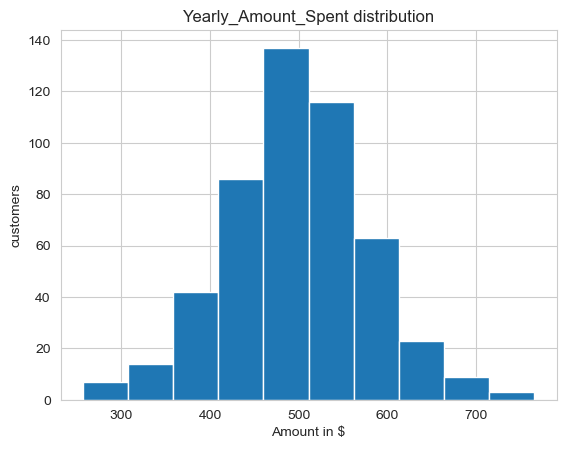

In [23]:
#Histogram show Yearly_Amount_Spent distribution
plt.hist(df.Yearly_Amount_Spent)
plt.title('Yearly_Amount_Spent distribution')
plt.xlabel('Amount in $')
plt.ylabel('customers')

<Axes: xlabel='Yearly_Amount_Spent', ylabel='Density'>

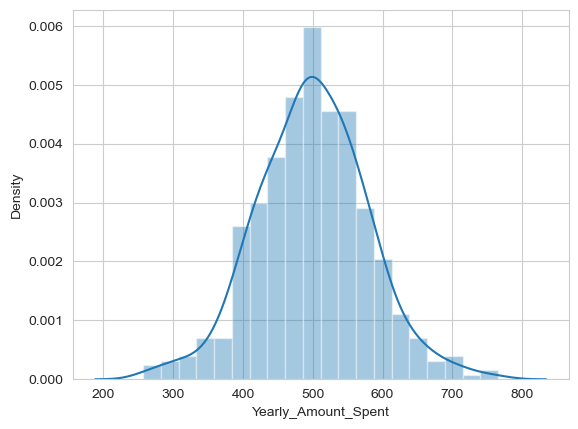

In [22]:
sns.distplot(df['Yearly_Amount_Spent'])

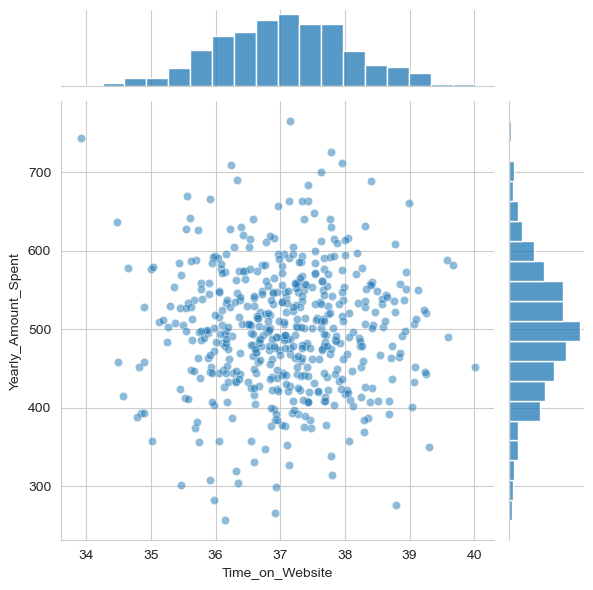

In [8]:
#jointplot Distribution btw Time_on_Website vs Yearly_Amount_Spent
sns.jointplot(x='Time_on_Website',y='Yearly_Amount_Spent',data=df,alpha=0.5)

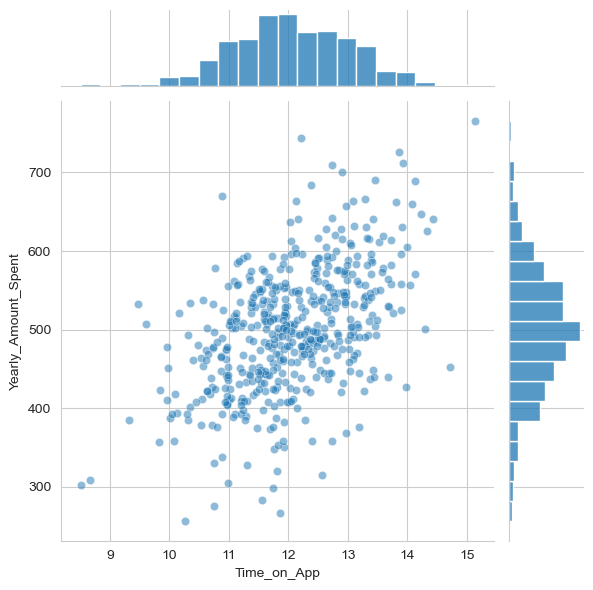

In [28]:
#jointplot Distribution btw Time_on_App vs Yearly_Amount_Spent
sns.jointplot(x='Time_on_App',y='Yearly_Amount_Spent',data=df,alpha=0.5)

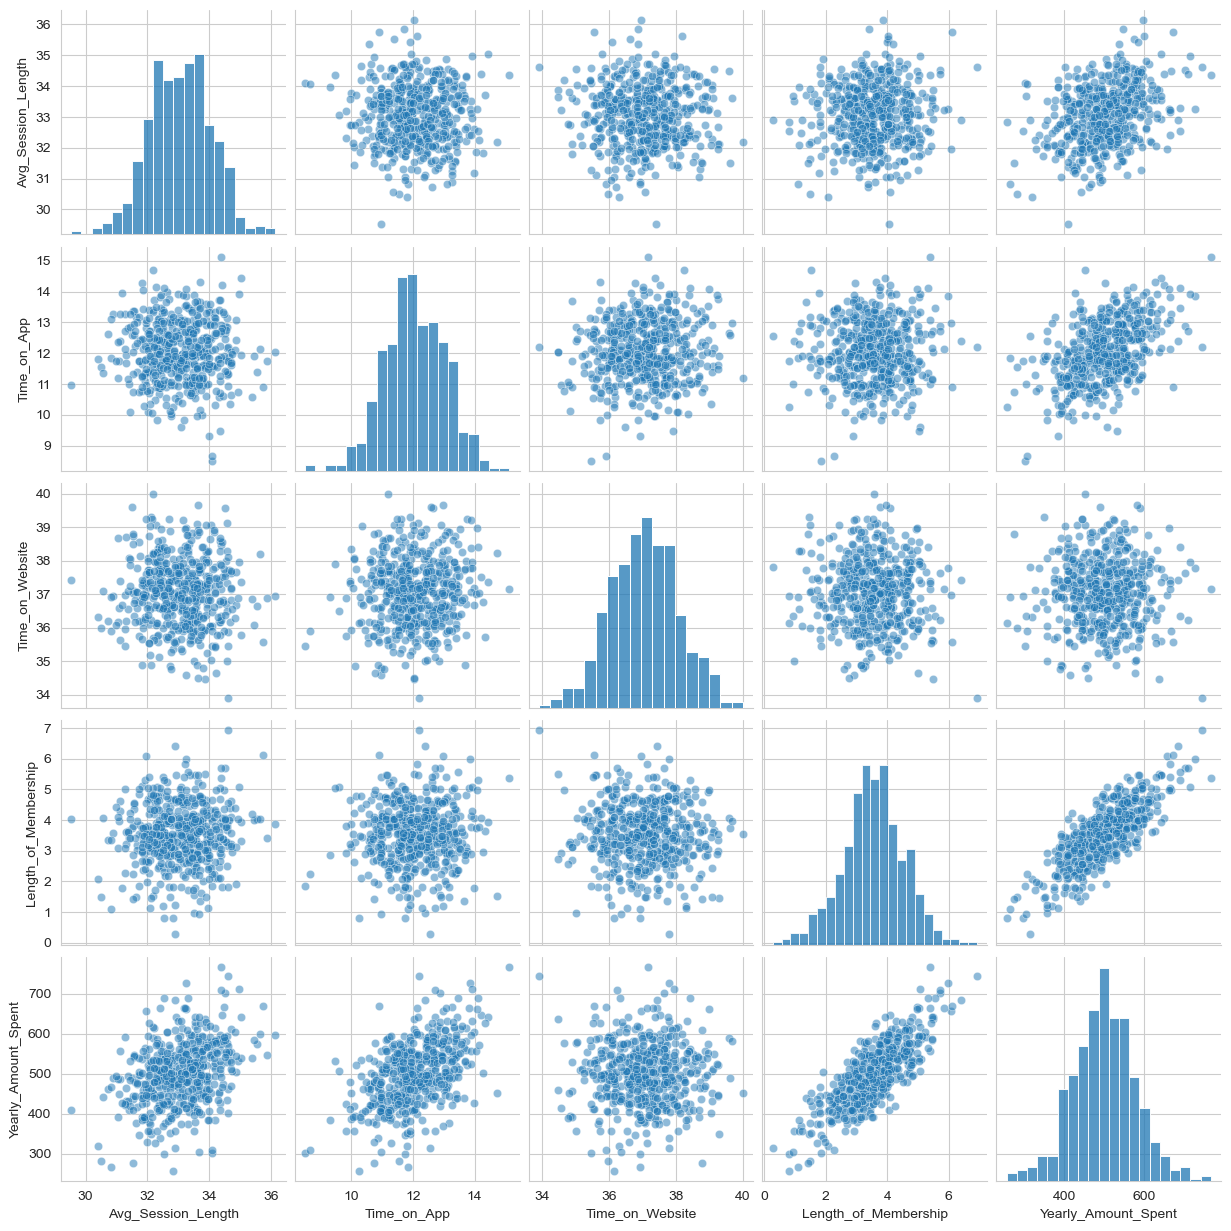

In [30]:
#Summarized pairplot
sns.pairplot(df,kind='scatter',plot_kws={'alpha':0.5})

<Axes: >

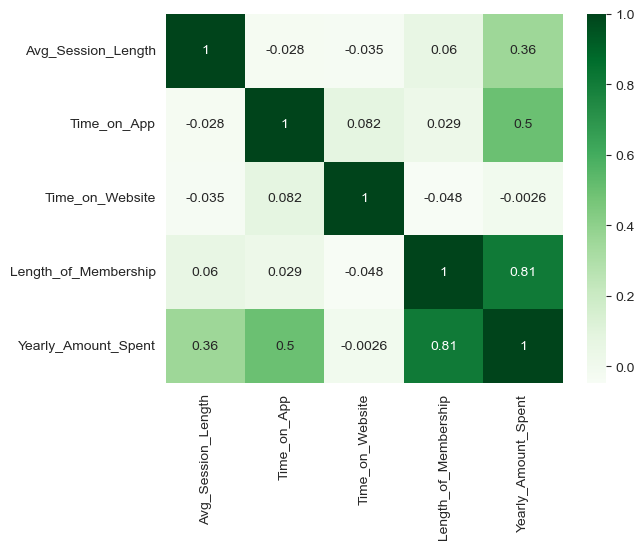

In [24]:
sns.heatmap(df.corr(),annot=True,cmap='Greens')

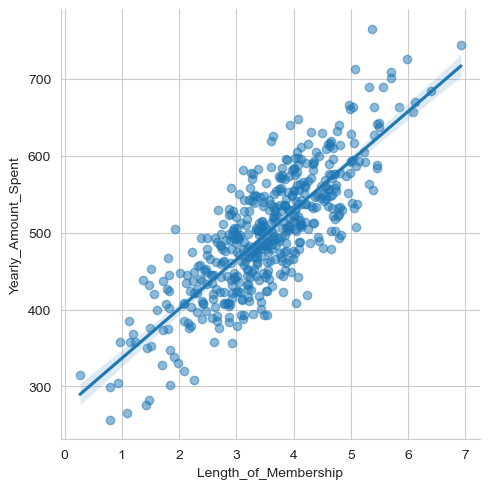

In [9]:
#creating simple line fit
sns.lmplot(x='Length_of_Membership',y='Yearly_Amount_Spent',data=df,scatter_kws={'alpha':0.5})

In [10]:
#Selecting the independent features
X= df.iloc[:, [3,4,5,6]]
X

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


In [11]:
#Dependent feature
y = df.iloc[:,[7]]
y

,Yearly_Amount_Spent
0,587.951054
1,392.204933
2,487.547505
3,581.852344
4,599.406092
...,...
495,573.847438
496,529.049004
497,551.620146
498,456.469510


In [12]:
#Testing and training the y, X
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [46]:
X_train.shape

(400, 4)

In [13]:
#calling linear regression object
lreg= LinearRegression()

In [14]:
#Fitting the X_train and y_train 
lreg.fit(X_train,y_train)

LinearRegression()

In [54]:
lreg.coef_

array([[25.59625911, 38.78534599,  0.31038592, 61.89682859]])

In [64]:
# Transpose the coefficients to match the indices
coefficients_transposed = lreg.coef_.reshape(-1, 1)

# Create the DataFrame with transposed coefficients
cdf = pd.DataFrame(coefficients_transposed, index=X.columns, columns=['coef'])
print(cdf)

                           coef
Avg_Session_Length    25.596259
Time_on_App           38.785346
Time_on_Website        0.310386
Length_of_Membership  61.896829


In [34]:
#predictions
pred_y =lreg.predict(X_test)
pred_X =lreg.predict(X_train)


In [27]:
from sklearn import metrics
#Mean absolute error
mae = metrics.mean_absolute_error(y_test,pred_y)
mae

8.558441887438086

In [28]:
print(np.sqrt(metrics.mean_squared_error(y_test,pred_y)))

10.481590583120537


In [29]:
from sklearn.metrics import r2_score
#R2 Score
r2_score(y_test,pred_y)

0.9778130629248283

Text(0.5, 1.0, 'Scatter Plot of Predicted vs Actual Values')

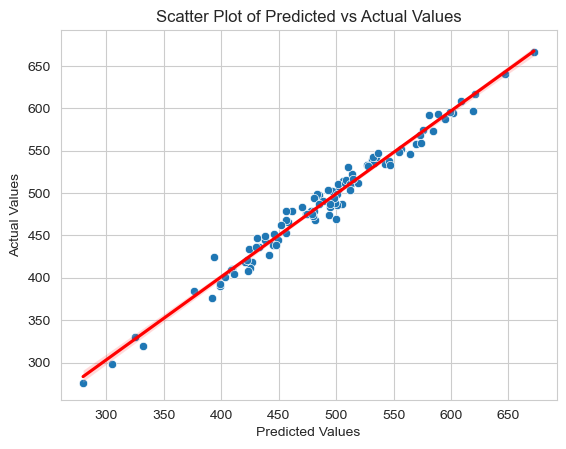

In [36]:
pred = np.array(pred_y).flatten()
y_test = np.array(y_test).flatten()
sns.scatterplot(x=pred, y=y_test)

sns.regplot(x=pred, y=y_test, scatter=False, color='red')

# Add labels and title
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Scatter Plot of Predicted vs Actual Values')

In [32]:
#residual
residual = y_test - pred_y

residual

array([[  -1.82916537,  131.91488753,   15.74044153, ...,   75.85705633,
          -9.87004467,   58.91844163],
       [-141.50012179,   -7.75606889, -123.93051489, ...,  -63.81390009,
        -149.54100109,  -80.75251479],
       [ -25.58698365,  108.15706925,   -8.01737675, ...,   52.09923805,
         -33.62786295,   35.16062335],
       ...,
       [ -54.89756569,   78.84648721,  -37.32795879, ...,   22.78865601,
         -62.93844499,    5.85004131],
       [   2.35492783,  136.09898073,   19.92453473, ...,   80.04114953,
          -5.68595147,   63.10253483],
       [ -50.6755557 ,   83.0684972 ,  -33.1059488 , ...,   27.010666  ,
         -58.716435  ,   10.0720513 ]])

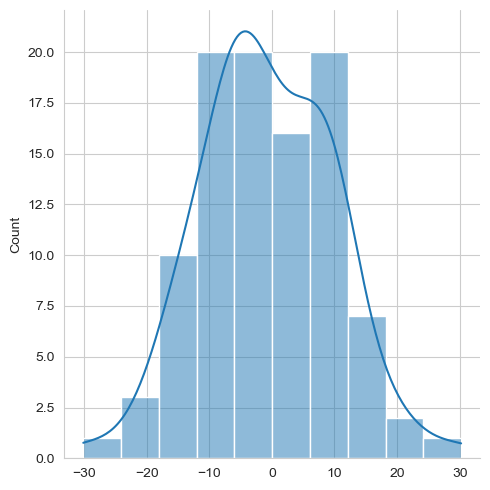

In [99]:
#histogram to show the estimated probability density function of the residuals.
sns.displot(residual,kde =True)#kernel density estimate (KDE)

This plot is useful for visually assessing the distribution of the residuals. It can help you check if the residuals are approximately normally 
distributed or if there are any significant deviations from normality. Deviations from a normal distribution may indicate issues with the model 
assumptions or data properties.

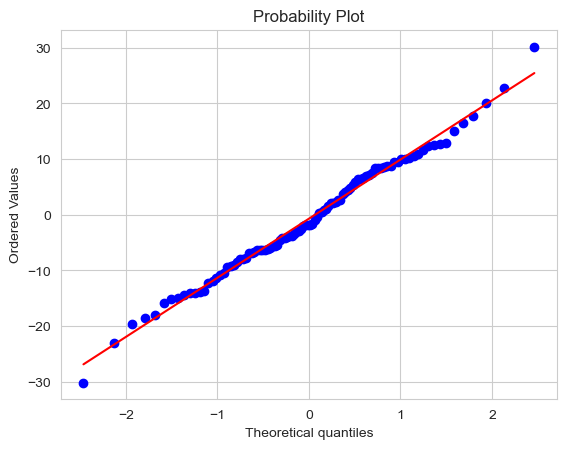

In [103]:
#checking the normality 
import pylab
import scipy.stats as stats

stats.probplot(residual, dist = 'norm',plot=pylab)
pylab.show()

If the points closely follow the diagonal line, it indicates that the residuals are normally distributed. 
If there are significant deviations, it suggests that the residuals do not follow a normal distribution, 
indicating potential issues with the model assumptions.


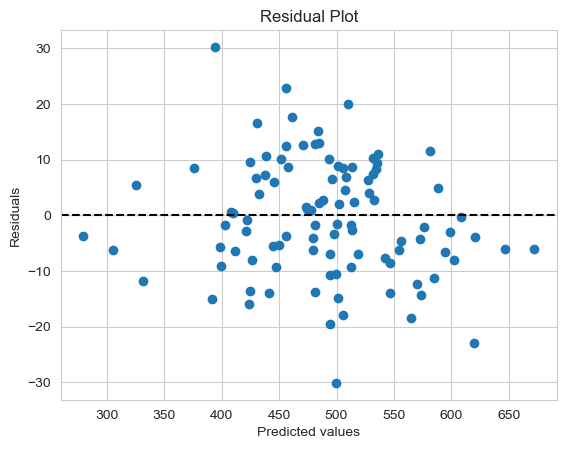

In [33]:
#Plotting residual plot using matplotlib
residuals = y_test - pred

plt.scatter(pred, residuals)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

-> If the residuals are randomly scattered around the zero line (horizontal line at y=0), with no clear pattern or structure, 
   it suggests that the regression model is capturing the data well, and the residuals are randomly distributed.
-> If there is a systematic pattern or structure in the residuals (e.g., a curved pattern, increasing or decreasing trend), 
  it indicates that the regression model may not be capturing all the information in the data, and there might be room for 
  improvement or further investigation into the model's assumptions.
  
In summary, the residual plot allows you to visually assess the goodness of fit of your regression model and detect any patterns or trends in the 
residuals that may indicate model inadequacie

In [120]:
#Testing the predictions
print(lreg.predict([[34,20,39,10]]))

[[1232.79565175]]


Avg_Session_Length = 34 min,
Time_on_App =20 min,
Time_on_Website = 39 min,
Length_of_Membership = 19 yrs,
Yearly_Amount_Spent = 1232.79565175